## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LR import LogisticRegression

In [8]:
class MultiClassLogisticRegression:
    
    def __init__(self, learning_rate = 1e-3, epochs = 1000, n_classes = 2):
        self.lr = learning_rate
        self.epochs = epochs
        self.n_classes = n_classes
        self.classifiers = []
        
    def fit(self, X, y):
        costs = []
        for cls in range(self.n_classes):
            new_y = np.where(y == cls, 1, 0)
            classifier = LogisticRegression(lr = self.lr, epochs = self.epochs)
            cost = classifier.fit(X,new_y)
            costs.append(cost)
            self.classifiers.append(classifier)
            print(cls + 1, ' Classifier Fitted')
        return costs
            
    def predict(self,X):
        predictions = np.array([classifier.predict(X) for classifier in self.classifiers])
        predictions = np.argmax(predictions, axis = 0)
        return predictions

### Load MNIST Dataset

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser = 'auto')
X, y = mnist["data"], mnist["target"]

# Convert target to integer and numpy array
y = y.astype(int)
X = X.to_numpy() / 255
y = y.to_numpy()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


### Visualize Some Digit

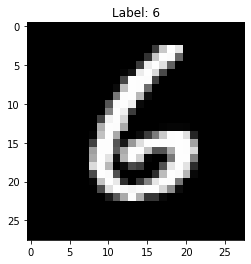

In [10]:
# Visualize the first digit
some_digit = X[6000].reshape(28, 28)
plt.imshow(some_digit, cmap='gray')
plt.title(f"Label: {y[6000]}")
plt.show()

### Split into Training and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56000, 784)
Shape of y_train: (56000,)
Shape of X_test: (14000, 784)
Shape of y_test: (14000,)


### Train the Model

In [12]:
clf = MultiClassLogisticRegression(learning_rate = 0.001, n_classes = 10, epochs = 10)
cost = clf.fit(X_train,y_train)
costs = np.sum(cost) / len(cost)
plt.plot(range(epochs), costs)
plt.show()

1  Classifier Fitted
2  Classifier Fitted
3  Classifier Fitted
4  Classifier Fitted
5  Classifier Fitted
6  Classifier Fitted
7  Classifier Fitted
8  Classifier Fitted
9  Classifier Fitted
10  Classifier Fitted


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [13]:
predictions = clf.predict(X_test)
print(np.mean(predictions == y_test))

0.6605


### Viusalize the results

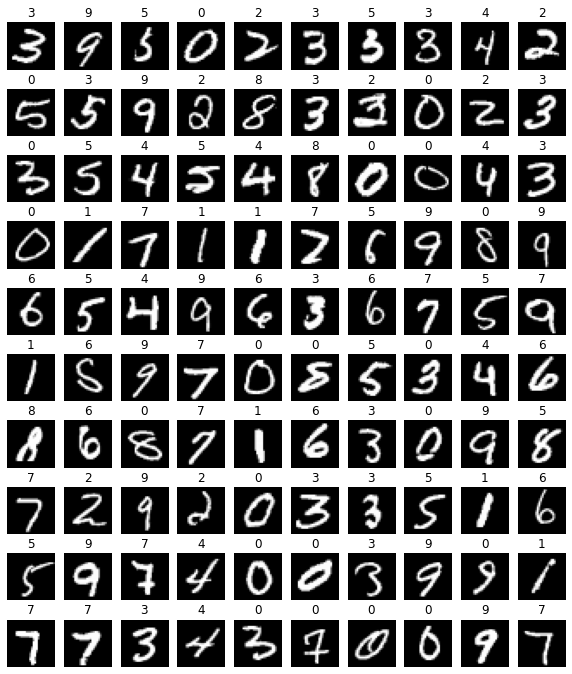

In [28]:
random_indices = np.random.randint(0,5000, size = 100)
plt.figure(figsize=(10, 12))
for i,index in enumerate(random_indices):
        plt.subplot(10, 10, i+1)
        plt.imshow(X_test[index].reshape(28,28)*255, cmap='gray')
        plt.title(f"{predictions[index]}")
        plt.axis('off')
plt.show()